# To predict the salary of employee.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Checking Null Values

In [5]:
#np.nan, None, Nan, others

In [6]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [7]:
df.isnull().sum().sum()     # Finding total number of null values.

0

We don't have any Null values, so we can proceed further.

In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Dataframe Description:

On the basis of the data we have to predict the salary of the employee, if the employee using the features provided in the data.

The dataset contains the data like 'rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'. 

# Checking the datatypes of the columns.

In [9]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

# Making DataFrame for the Nominal Data

Deep Copy

In [10]:
df_visualization_nominal=df[['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']].copy()

In [11]:
id(df)

2871516298400

In [12]:
id(df_visualization_nominal)

2871606447504

In [13]:
df_copy=df.copy(deep=False)

In [14]:
id(df_copy)

2871606596992

In [15]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Visualization of the Data:

Male      358
Female     39
Name: sex, dtype: int64


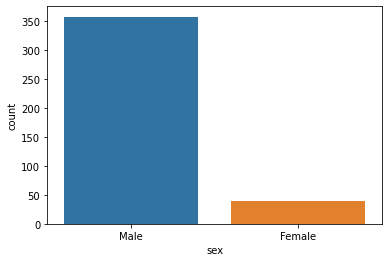

In [16]:
ax=sns.countplot(x='sex', data=df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

From the above observations the total number of male employees are 358, and Female employees are 39.

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


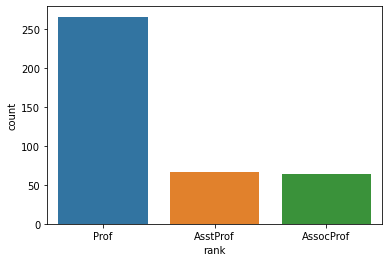

In [17]:
ax=sns.countplot(x='rank', data=df_visualization_nominal)
print(df_visualization_nominal['rank'].value_counts())

From the above observations we have three classes for the columns "rank". Prof with the count of 266, AsstProf with the count of 67, AssocProf with the count of 64.

B    216
A    181
Name: discipline, dtype: int64


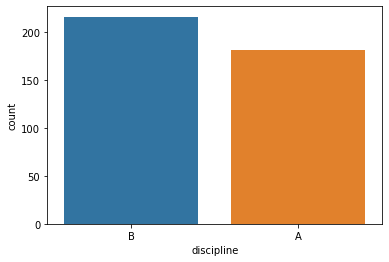

In [18]:
ax=sns.countplot(x='discipline', data=df_visualization_nominal)
print(df_visualization_nominal['discipline'].value_counts())

From the observations, we have two classes for the column "discipline". For the discipline A we have 181 employees, B we have 216 employees.

# Checking the distribution of the continuous value.

In [19]:
df_visualization_nominal.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

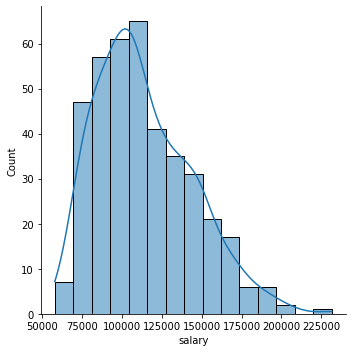

In [20]:
sns.displot(df_visualization_nominal['salary'], kde=True)

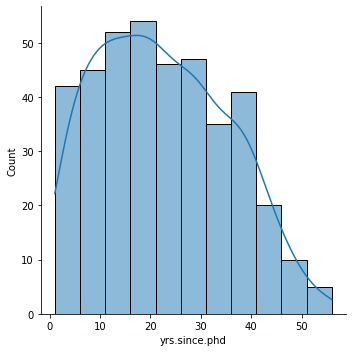

In [21]:
sns.displot(df_visualization_nominal['yrs.since.phd'], kde=True)

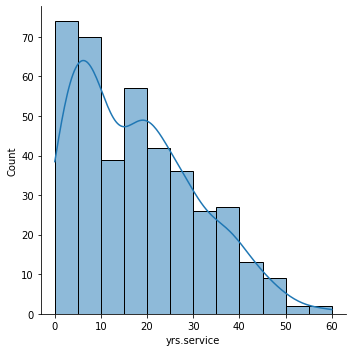

In [22]:
sns.displot(df_visualization_nominal['yrs.service'], kde=True)

Since the dataset has some of the string values. We will use the encoding techniques to convert the string data to numeric data.

# Encoding of DataFrame:

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [24]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [25]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

# Describe the dataset:

In [26]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,397.0,1.508816,0.757486,0.0,1.0,2.0,2.0,2.0
discipline,397.0,0.544081,0.498682,0.0,0.0,1.0,1.0,1.0
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
sex,397.0,0.901763,0.298010,0.0,1.0,1.0,1.0,1.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


<AxesSubplot:>

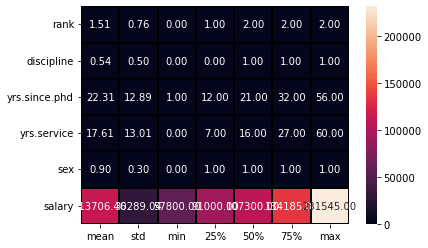

In [28]:
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

# Correlation of the columns with the target columns:

In [29]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

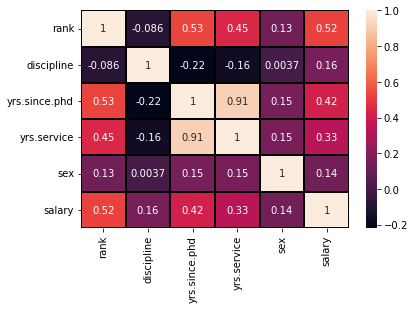

In [30]:
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black")

Checking the columns which are positively and negatively correlated with the target columns:

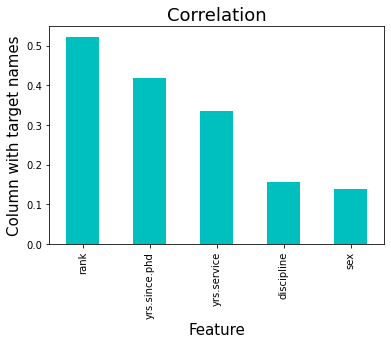

In [31]:
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Column with target names',fontsize=15)
plt.title('Correlation',fontsize=18)
plt.show()

In [32]:
df.skew().sort_values()

sex             -2.709958
rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Outliers Check:

In [33]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

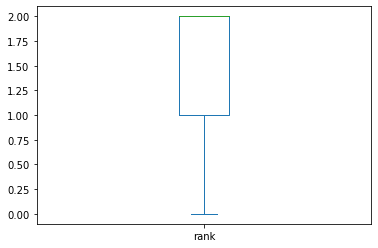

In [34]:
df['rank'].plot.box()

<AxesSubplot:>

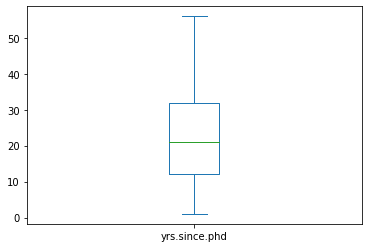

In [35]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

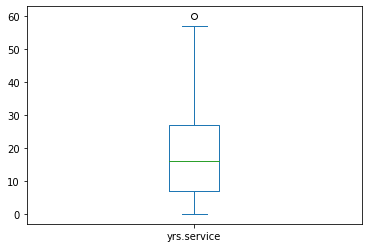

In [36]:
df['yrs.service'].plot.box()

<AxesSubplot:>

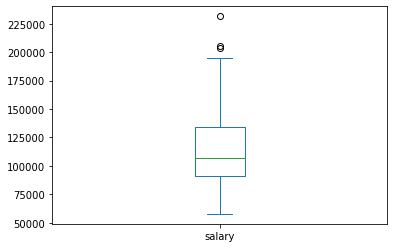

In [37]:
df['salary'].plot.box()

<AxesSubplot:>

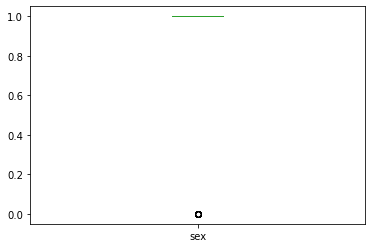

In [38]:
df['sex'].plot.box()

# Removing the outliers

In [39]:
df.shape

(397, 6)

In [41]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [42]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [43]:
df.shape

(397, 6)

In [44]:
df_new.shape

(354, 6)

In [1]:
# Percentage loss of data:

Data_loss=((397-354)/397)*100
Data_loss

10.831234256926953

# Seperating the columns into features and target

In [46]:
features=df.iloc[:,0:-1]
target=df.iloc[:,-1]

# Scaling the data using Min-Max Scaler:

In [47]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.metrics import r2_score

In [53]:
lr=LinearRegression()

In [54]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.3611999954853077
At random state 0, the testing accuracy is:- 0.4079258314975236


At random state 1, the training accuracy is:- 0.3604245854198438
At random state 1, the testing accuracy is:- 0.41633641876629457


At random state 2, the training accuracy is:- 0.37547390964955596
At random state 2, the testing accuracy is:- 0.3600189554526694


At random state 3, the training accuracy is:- 0.3847313825130595
At random state 3, the testing accuracy is:- 0.3293529875010861


At random state 4, the training accuracy is:- 0.38517450334380465
At random state 4, the testing accuracy is:- 0.304400813331562


At random state 5, the training accuracy is:- 0.3950033630150771
At random state 5, the testing accuracy is:- 0.2752907752774737


At random state 6, the training accuracy is:- 0.3650308031752799
At random state 6, the testing accuracy is:- 0.40189870806075667


At random state 7, the training accuracy is:- 0.3575963886324032
At random state

In [55]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [56]:
# Train the model

lr.fit(features_train,target_train)

LinearRegression()

In [57]:
pred_test=lr.predict(features_test)

In [58]:
print(r2_score(target_test,pred_test))

0.34397033297856505


# Cross-Validation of the model:

In [60]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} accuracy score of training is {Train_accuracy} and accuracy score of testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.3270801167406512 accuracy score of training is -0.29698823968926513 and accuracy score of testing is 0.34397033297856505


At cross fold 3 the cv score is 0.3203328673059879 accuracy score of training is -0.29698823968926513 and accuracy score of testing is 0.34397033297856505


At cross fold 4 the cv score is 0.3218196693768362 accuracy score of training is -0.29698823968926513 and accuracy score of testing is 0.34397033297856505


At cross fold 5 the cv score is 0.29569928663871775 accuracy score of training is -0.29698823968926513 and accuracy score of testing is 0.34397033297856505


At cross fold 6 the cv score is 0.33096341839295546 accuracy score of training is -0.29698823968926513 and accuracy score of testing is 0.34397033297856505


At cross fold 7 the cv score is 0.3257704419996536 accuracy score of training is -0.29698823968926513 and accuracy score of testing is 0.34397033297856505


At cross fold 8 the cv score is 0.3310060584513582 accur

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=6 is selected.

Here we have to handle the problem of the overfitting and the underfitting by checking the training ans testing score.

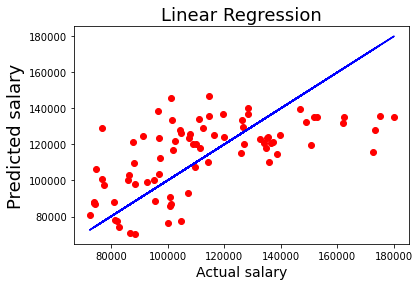

In [61]:
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual salary', fontsize=14)
plt.ylabel('Predicted salary',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization:

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [66]:
# Final model training

ls=Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

37.67649888252015

In [67]:
pred_ls=ls.predict(features_test)

In [69]:
lss=r2_score(target_test,pred_ls)
lss*100

34.38690842511897

In [70]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

29.57540706085594

# Ensemble technique:

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [77]:
rf=RandomForestRegressor(criterion="mae",max_features='sqrt')
rf.fit(features_train,target_train)
train_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
print('Training r2',train_r2)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.8413497341626541
R2 Score: 35.87947934093666
Cross Val Score: 28.412905283249266


# Saving the Model:

In [78]:
import pickle
filename='sal.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [79]:
loaded_model=pickle.load(open('sal.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

35.87947934093666


In [81]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])

In [82]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predicted,153093.325,112490.71,131758.72,137084.975,83604.005,124905.365,96117.155,87167.975,143820.64,111141.175,...,75332.12,105677.205,121117.165,91323.56,83785.415,80395.19,113594.12,78559.445,131362.895,169555.54
Original,153093.325,112490.71,131758.72,137084.975,83604.005,124905.365,96117.155,87167.975,143820.64,111141.175,...,75332.12,105677.205,121117.165,91323.56,83785.415,80395.19,113594.12,78559.445,131362.895,169555.54


In [83]:
conclusion.transpose()

,Predicted,Original
0,153093.325,153093.325
1,112490.710,112490.710
2,131758.720,131758.720
3,137084.975,137084.975
4,83604.005,83604.005
...,...,...
75,80395.190,80395.190
76,113594.120,113594.120
77,78559.445,78559.445
78,131362.895,131362.895
